# Machine Learning and Computational Statistics

## Homework 1

### Exercise 1

Implement in Python the regularized linear regression model. As an example implementation see the MATLAB functions ml_linregTrain.m and ml_linregTest.m and the associated demo linreg.m that runs the code in data1Tr.txt (used for training) and data1Ts.txt (used for testing).

First we import the necessairy libraries:

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Now we load the data and split the input from the output:

In [2]:
train_data = numpy.loadtxt(fname='matlab_code/data1Tr.txt', delimiter=' ')
input_data = train_data[:, 0]
target_data = train_data[:, 1]

We expand the input data by prepending a column with 1s, to accomodate the constant parameter of the linear model:

In [3]:
(input_rows,) = input_data.shape
input_data = numpy.expand_dims(input_data, axis=1)
input_data = numpy.insert(input_data, 0, numpy.ones(input_rows), axis=1)
(input_rows, input_columns) = input_data.shape

For this training we set the lambda parameter to 0

In [4]:
lamda=0

We train the linear model:

In [5]:
T = numpy.matmul(numpy.transpose(input_data), target_data)
K = numpy.matmul(numpy.transpose(input_data), input_data) + lamda*numpy.identity(input_columns)
w = numpy.linalg.solve(K, T)
y = numpy.dot(input_data,w)
beta = input_rows / ((y-target_data)**2).sum()

We load the test data:

In [6]:
test_data = numpy.loadtxt(fname='matlab_code/data1Ts.txt', delimiter=' ')

We expand the test data by adding a column of 1s:

In [7]:
(test_rows,) = test_data.shape
test_data = numpy.expand_dims(test_data, axis=1)
test_data = numpy.insert(test_data, 0, numpy.ones(test_rows), axis=1)

We use the linear model to predict the result:

In [8]:
y = numpy.dot(test_data, w)
var = (1/beta)*numpy.ones(test_rows)

Finally we plot the training data (blue) and the fitted model:

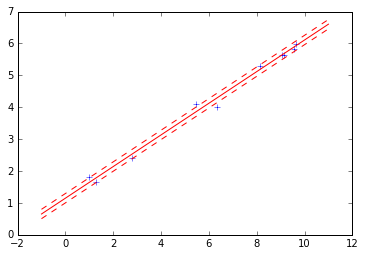

In [9]:
plt.plot(input_data[:,1], target_data, 'b+')
plt.plot(test_data[:,1], y, 'r')
plt.plot(test_data[:,1], y-numpy.sqrt(var), 'r--')
plt.plot(test_data[:,1], y+numpy.sqrt(var), 'r--')
plt.show()

### Exercise 2

Also, implement in Python the regularized logistic regression model optimized using gradient descent/ascent. As an example implementation see the MATLAB functions ml_logregTrain.m and ml_logregTest.m and the associated demo logreg.m that runs the code in data2Tr.txt (used for training) and data2Ts.txt (used for testing).

First we import the necessairy libraries:

In [10]:
import numpy
from scipy.stats import logistic
import matplotlib.pyplot as plt
%matplotlib inline

Now we load the data and split the input from the output:

In [11]:
train_data = numpy.loadtxt(fname='matlab_code/data2Tr.txt', delimiter=' ')
input_data = train_data[:, 0:2]
target_data = train_data[:, 2]

We expand the input data by prepending a column with 1s, to accomodate the constant parameter of the linear model:

In [12]:
(input_rows, input_columns) = input_data.shape
input_data = numpy.insert(input_data, 0, numpy.ones(input_rows), axis=1)
(input_rows, input_columns) = input_data.shape

For this training we set the lambda parameter to 0, the iterations to 500, the tolerance to 0.000001 and the learning rate to 8/rows of data:

In [13]:
lamda = 0
iterations = 500
tolerance = 0.000001
learning_rate = 8/input_rows

We initialize w to zero:

In [14]:
w = numpy.zeros(input_columns)

We perform the gradient descent to train the logistic model:

In [15]:
ew_old = -numpy.inf
for i in range(iterations):
    yx = numpy.dot(input_data, w)
    s = logistic.cdf(yx)
    
    ew = (target_data*numpy.log(s) + (1-target_data)*numpy.log(1-s)).sum() - (0.5*lamda)*(numpy.matmul(numpy.transpose(w), w))
    print('Iteration: {}, Cost function: {}'.format(i, ew));
    
    if abs(ew - ew_old) < tolerance:
        break;
    
    gradient = numpy.matmul(numpy.transpose(input_data), target_data-s) - lamda*w
    
    w = w + learning_rate*gradient
    ew_old = ew

Iteration: 0, Cost function: -27.725887222397812
Iteration: 1, Cost function: -24.46629741171427
Iteration: 2, Cost function: -22.536511572446166
Iteration: 3, Cost function: -22.116229369707966
Iteration: 4, Cost function: -23.074381449108436
Iteration: 5, Cost function: -25.333748012251945
Iteration: 6, Cost function: -24.993065971862258
Iteration: 7, Cost function: -24.83529314372842
Iteration: 8, Cost function: -21.399105758000168
Iteration: 9, Cost function: -19.558810626741632
Iteration: 10, Cost function: -16.907541699538584
Iteration: 11, Cost function: -15.286912148987991
Iteration: 12, Cost function: -13.823184823072973
Iteration: 13, Cost function: -12.891475520245148
Iteration: 14, Cost function: -12.205873931821333
Iteration: 15, Cost function: -11.755709046930185
Iteration: 16, Cost function: -11.43186527731044
Iteration: 17, Cost function: -11.190401370425883
Iteration: 18, Cost function: -10.993102277392426
Iteration: 19, Cost function: -10.821655194306189
Iteration: 20

We load the test data:

In [16]:
test_data = numpy.loadtxt(fname='matlab_code/data2Ts.txt', delimiter=' ')

We expand the test data by adding a column of 1s:

In [17]:
(test_rows, test_columns) = test_data.shape
test_data = numpy.insert(test_data, 0, numpy.ones(test_rows), axis=1)
(test_rows, test_columns) = test_data.shape

We use the linear model to predict the result and the class:

In [18]:
res = logistic.cdf(numpy.dot(test_data,w))
out_class = numpy.around(y)

On the plot bellow we present the training data and the decision boundaries:

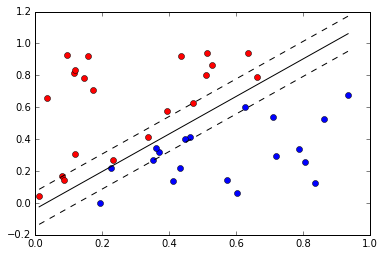

In [19]:
plt.plot(input_data[target_data==0,1], input_data[target_data==0,2], 'ro')
plt.plot(input_data[target_data==1,1], input_data[target_data==1,2], 'bo')
minX = min(input_data[:, 1]); 
maxX = max(input_data[:, 1]);
plt.plot((minX, maxX), (-w[0]/w[2] - ((w[1]/w[2])*minX), -w[0]/w[2] - ((w[1]/w[2])*maxX)), 'k')
plt.plot((minX, maxX), (-numpy.log(0.9/0.1)/w[2] - w[0]/w[2] - ((w[1]/w[2])*minX), -numpy.log(0.9/0.1)/w[2] - w[0]/w[2] - ((w[1]/w[2])*maxX)), 'k--')
plt.plot((minX, maxX), (-numpy.log(0.1/0.9)/w[2] - w[0]/w[2] - ((w[1]/w[2])*minX), -numpy.log(0.1/0.9)/w[2] - w[0]/w[2] - ((w[1]/w[2])*maxX)), 'k--')
plt.show()

On the second plot we present the propabilities on the test data. The more mixed the color is, the closer the propability is to 0.5:

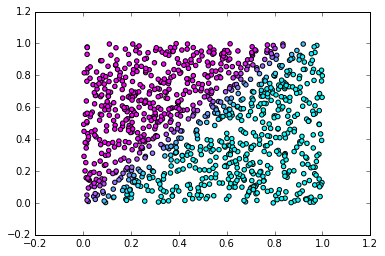

In [20]:
 plt.scatter(test_data[:, 1], test_data[:, 2], c=res, cmap='cool_r')